In [733]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import TimeSeriesSplit
from scipy import stats
from collections import Counter
from sklearn.metrics import accuracy_score

In [734]:
weather = pd.read_csv("../Tan - Random Forest/hanoiweather.csv")

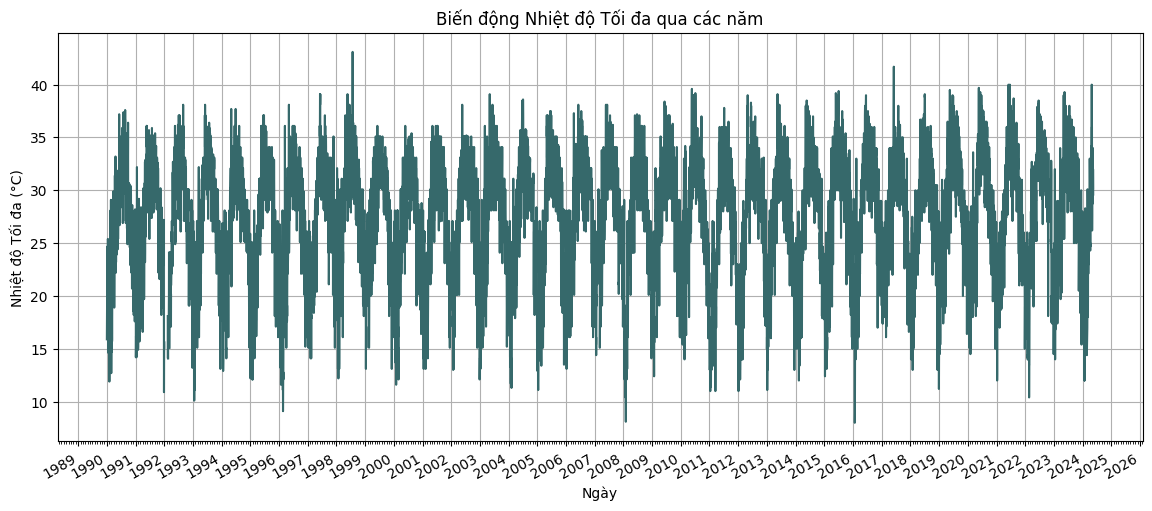

In [735]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df =weather
# Giả sử 'df' là DataFrame của bạn chứa cột 'datetime' và 'tempmax'
# Đảm bảo rằng cột 'datetime' đã được chuyển đổi thành kiểu dữ liệu datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Tạo biểu đồ
plt.figure(figsize=(14, 6))  # Tùy chỉnh kích thước biểu đồ
plt.plot(df['datetime'], df['tempmax'], marker='', linestyle='-', color='#36696b')

# Định dạng trục x
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Đặt vị trí các dấu lớn theo từng năm
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Định dạng hiển thị là năm
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Đặt vị trí các dấu nhỏ theo từng tháng

plt.gcf().autofmt_xdate()  # Tự động điều chỉnh định dạng ngày dọc theo trục x để không bị chồng chéo
plt.title('Biến động Nhiệt độ Tối đa qua các năm')  # Tiêu đề biểu đồ
plt.xlabel('Ngày')  # Nhãn cho trục x
plt.ylabel('Nhiệt độ Tối đa (°C)')  # Nhãn cho trục y
plt.grid(True)  # Hiển thị lưới
plt.show()


In [736]:
max_temperature = df['tempmax'].max()
min_temperature = df['tempmin'].min()

print("Nhiệt độ tối đa trong bộ dữ liệu là:", max_temperature, "°C")
print("Nhiệt độ tối thiểu trong bộ dữ liệu là:", min_temperature, "°C")

Nhiệt độ tối đa trong bộ dữ liệu là: 43.1 °C
Nhiệt độ tối thiểu trong bộ dữ liệu là: 3.8 °C


C:\Users\Asus\AppData\Local\Temp\ipykernel_8312\1984651068.py:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_max_temps = df['tempmax'].resample('Y').max()
C:\Users\Asus\AppData\Local\Temp\ipykernel_8312\1984651068.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_min_temps = df['tempmin'].resample('Y').min()


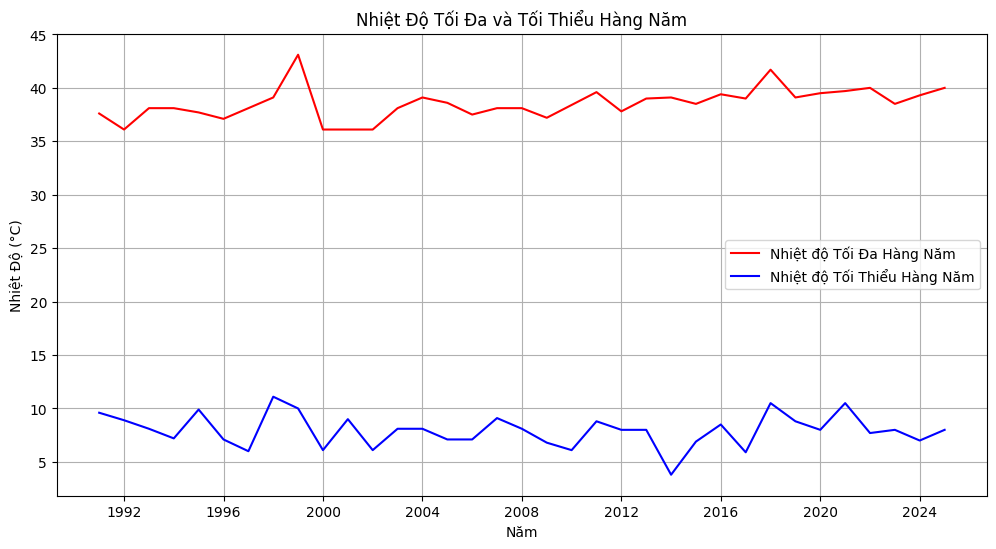

In [737]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df has a column 'date' with date information
# Convert 'date' column to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Set 'date' column as index
df.set_index('datetime', inplace=True)

# Tạo biểu đồ
plt.figure(figsize=(12, 6))

# Resample to get annual maximum and minimum temperatures
annual_max_temps = df['tempmax'].resample('Y').max()
annual_min_temps = df['tempmin'].resample('Y').min()

# Vẽ đường cho nhiệt độ tối đa hàng năm
plt.plot(annual_max_temps, label='Nhiệt độ Tối Đa Hàng Năm', color='red')

# Vẽ đường cho nhiệt độ tối thiểu hàng năm
plt.plot(annual_min_temps, label='Nhiệt độ Tối Thiểu Hàng Năm', color='blue')

# Thêm tiêu đề và nhãn
plt.title('Nhiệt Độ Tối Đa và Tối Thiểu Hàng Năm')
plt.xlabel('Năm')
plt.ylabel('Nhiệt Độ (°C)')

# Thêm chú thích
plt.legend()

# Hiển thị lưới
plt.grid(True)

# Hiển thị biểu đồ
plt.show()




In [738]:
from datetime import datetime

def time_to_minutes(time_str):
    # Định nghĩa các định dạng thời gian khác nhau
    formats = ["%Y-%m-%dT%H:%M:%S", "%Y-%m-%d %H:%M:%S"]
    
    for fmt in formats:
        try:
            # Cố gắng phân tích chuỗi thời gian với từng định dạng
            time_obj = datetime.strptime(time_str, fmt)
            return time_obj.hour * 60 + time_obj.minute
        except ValueError:
            # Nếu định dạng không khớp, thử định dạng tiếp theo
            continue
    
    # Nếu không có định dạng nào khớp, in lỗi
    raise ValueError(f"Thời gian '{time_str}' không khớp với bất kỳ định dạng nào đã biết")

# Biến đổi thời gian của sunrise và sunset
weather['sunrise_minutes'] = weather['sunrise'].apply(time_to_minutes)
weather['sunset_minutes'] = weather['sunset'].apply(time_to_minutes)

In [739]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,sunrise_minutes,sunset_minutes
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,NaN,1990-01-01T06:33:41,1990-01-01T17:26:18,0.14,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,393,1046
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,NaN,1990-01-02T06:34:00,1990-01-02T17:26:56,0.18,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1046
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,NaN,1990-01-03T06:34:18,1990-01-03T17:27:34,0.22,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1047
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,NaN,1990-01-04T06:34:35,1990-01-04T17:28:12,0.25,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1048
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,NaN,1990-01-05T06:34:51,1990-01-05T17:28:51,0.29,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,Hà Nội,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,17.168,...,60.0,2024-05-12T05:20:10,2024-05-12T18:26:03,0.13,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999...",320,1106
2024-05-13,Hà Nội,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,142.584,...,10.0,2024-05-13T05:19:44,2024-05-13T18:26:28,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999...",319,1106
2024-05-14,Hà Nội,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,0.900,...,30.0,2024-05-14T05:19:18,2024-05-14T18:26:54,0.20,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999...",319,1106


In [740]:
# Tạo cột mới có giá trị là nhiệt độ cao nhất của ngày hôm sau 
weather['tempmax_next'] = weather['tempmax'].shift(-1)

In [741]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sunrise,sunset,moonphase,conditions,description,icon,stations,sunrise_minutes,sunset_minutes,tempmax_next
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,1990-01-01T06:33:41,1990-01-01T17:26:18,0.14,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,393,1046,17.4
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,1990-01-02T06:34:00,1990-01-02T17:26:56,0.18,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1046,18.2
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,1990-01-03T06:34:18,1990-01-03T17:27:34,0.22,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1047,19.6
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,1990-01-04T06:34:35,1990-01-04T17:28:12,0.25,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1048,18.1
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,1990-01-05T06:34:51,1990-01-05T17:28:51,0.29,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1048,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,Hà Nội,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,17.168,...,2024-05-12T05:20:10,2024-05-12T18:26:03,0.13,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999...",320,1106,30.1
2024-05-13,Hà Nội,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,142.584,...,2024-05-13T05:19:44,2024-05-13T18:26:28,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999...",319,1106,32.0
2024-05-14,Hà Nội,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,0.900,...,2024-05-14T05:19:18,2024-05-14T18:26:54,0.20,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999...",319,1106,31.0


In [742]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sunrise,sunset,moonphase,conditions,description,icon,stations,sunrise_minutes,sunset_minutes,tempmax_next
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,1990-01-01T06:33:41,1990-01-01T17:26:18,0.14,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,393,1046,17.4
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,1990-01-02T06:34:00,1990-01-02T17:26:56,0.18,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1046,18.2
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,1990-01-03T06:34:18,1990-01-03T17:27:34,0.22,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1047,19.6
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,1990-01-04T06:34:35,1990-01-04T17:28:12,0.25,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1048,18.1
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,1990-01-05T06:34:51,1990-01-05T17:28:51,0.29,Overcast,Cloudy skies throughout the day.,cloudy,48820099999,394,1048,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,Hà Nội,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,17.168,...,2024-05-12T05:20:10,2024-05-12T18:26:03,0.13,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"48820099999,48823099999,48825099999,4883109999...",320,1106,30.1
2024-05-13,Hà Nội,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,142.584,...,2024-05-13T05:19:44,2024-05-13T18:26:28,0.16,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999...",319,1106,32.0
2024-05-14,Hà Nội,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,0.900,...,2024-05-14T05:19:18,2024-05-14T18:26:54,0.20,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"48820099999,48823099999,48825099999,4883109999...",319,1106,31.0


In [743]:

se = ((weather['tempmax_next'] - weather['tempmax']) ** 2)
print(se.mean())

6.498185022026432


In [744]:
# Mã hoá Conditions vì là dữ liệu phân loại 
conditions_encoded = pd.get_dummies(weather['conditions'], prefix='cond')
weather= pd.concat([weather, conditions_encoded], axis=1)

In [745]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,stations,sunrise_minutes,sunset_minutes,tempmax_next,cond_Clear,cond_Overcast,cond_Partially cloudy,cond_Rain,"cond_Rain, Overcast","cond_Rain, Partially cloudy"
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,48820099999,393,1046,17.4,False,True,False,False,False,False
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,48820099999,394,1046,18.2,False,True,False,False,False,False
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,48820099999,394,1047,19.6,False,True,False,False,False,False
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,48820099999,394,1048,18.1,False,True,False,False,False,False
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,48820099999,394,1048,17.7,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,Hà Nội,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,17.168,...,"48820099999,48823099999,48825099999,4883109999...",320,1106,30.1,False,False,False,False,False,True
2024-05-13,Hà Nội,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,142.584,...,"48820099999,48823099999,48825099999,4883109999...",319,1106,32.0,False,False,False,False,False,True
2024-05-14,Hà Nội,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,0.900,...,"48820099999,48823099999,48825099999,4883109999...",319,1106,31.0,False,False,False,False,False,True


In [746]:
# Lựa chọn các loại đặc trưng độ ẩm, lớp phủ mây, tốc độ gió,  áp suất mực nước biển
features = ['tempmax', 'tempmin', 'humidity', 'cloudcover', 'windspeed', 'sealevelpressure', 'moonphase', 'visibility', 'winddir', 'feelslikemax' ,'feelslikemin','feelslike', 'dew', 'temp', 'sunrise_minutes', 'sunset_minutes', ]
X = weather[features]
y = weather['tempmax_next']

In [747]:
df_features = df[features]

                   tempmax   tempmin  humidity  cloudcover  windspeed  \
tempmax           1.000000  0.900585 -0.013220   -0.272265   0.095752   
tempmin           0.900585  1.000000  0.189267    0.014007   0.086919   
humidity         -0.013220  0.189267  1.000000    0.505977   0.018895   
cloudcover       -0.272265  0.014007  0.505977    1.000000   0.161781   
windspeed         0.095752  0.086919  0.018895    0.161781   1.000000   
sealevelpressure -0.808134 -0.855253 -0.280550   -0.085055  -0.129784   
moonphase         0.004939  0.003343  0.003816   -0.003235   0.001506   
visibility        0.304076  0.333874 -0.233633    0.032228  -0.015531   
winddir           0.176921  0.123143 -0.008436   -0.132616  -0.138401   
feelslikemax      0.957243  0.897514  0.075018   -0.168007   0.115267   
feelslikemin      0.879382  0.969115  0.126527   -0.012107   0.075954   
feelslike         0.945437  0.937639  0.066840   -0.124639   0.089228   
dew               0.852551  0.934163  0.471560    0

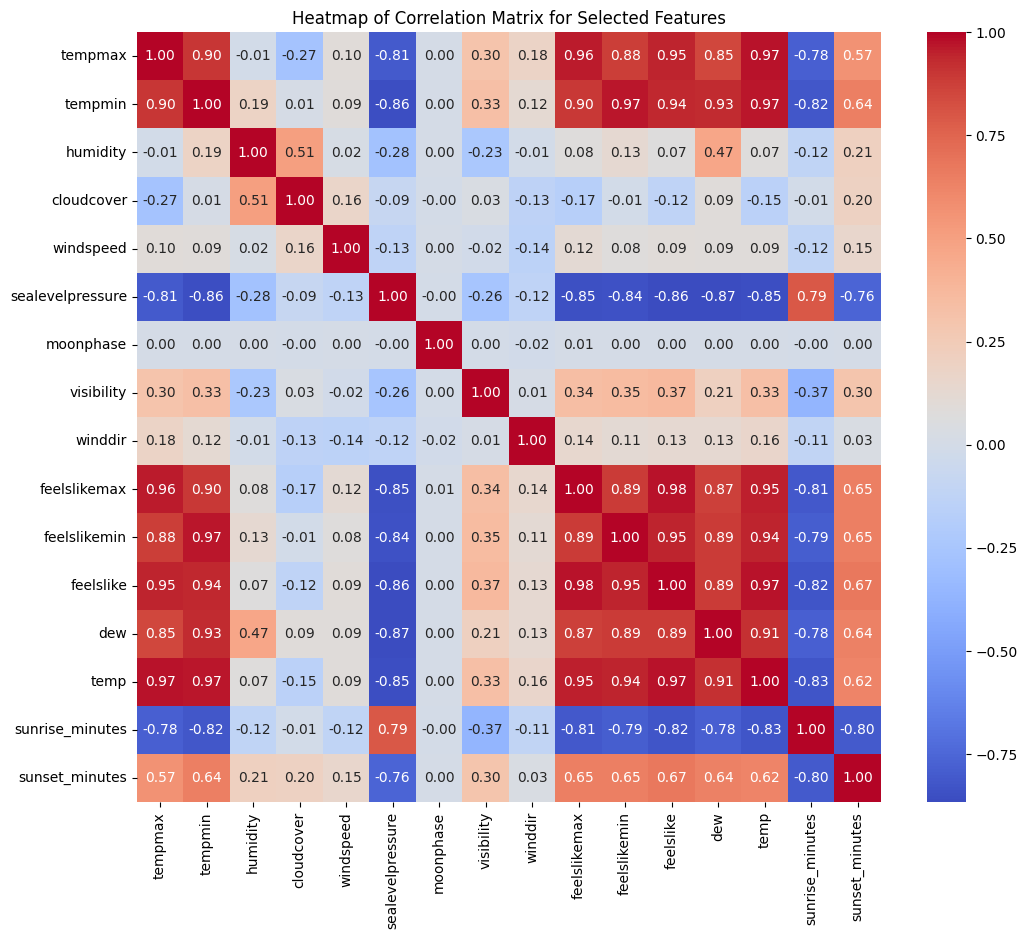

In [748]:
correlation_matrix = df_features.corr()

# In ra ma trận tương quan
print(correlation_matrix)

# Vẽ biểu đồ nhiệt độ tương quan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix for Selected Features')
plt.show()

In [749]:
#Thêm condition vào features 
condition_features = [col for col in weather.columns if 'cond_' in col]
features.extend(condition_features)

In [750]:
features

['tempmax',
 'tempmin',
 'humidity',
 'cloudcover',
 'windspeed',
 'sealevelpressure',
 'moonphase',
 'visibility',
 'winddir',
 'feelslikemax',
 'feelslikemin',
 'feelslike',
 'dew',
 'temp',
 'sunrise_minutes',
 'sunset_minutes',
 'cond_Clear',
 'cond_Overcast',
 'cond_Partially cloudy',
 'cond_Rain',
 'cond_Rain, Overcast',
 'cond_Rain, Partially cloudy']

In [751]:
weather.head(5)

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,stations,sunrise_minutes,sunset_minutes,tempmax_next,cond_Clear,cond_Overcast,cond_Partially cloudy,cond_Rain,"cond_Rain, Overcast","cond_Rain, Partially cloudy"
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,48820099999,393,1046,17.4,False,True,False,False,False,False
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,48820099999,394,1046,18.2,False,True,False,False,False,False
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,48820099999,394,1047,19.6,False,True,False,False,False,False
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,48820099999,394,1048,18.1,False,True,False,False,False,False
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,48820099999,394,1048,17.7,False,True,False,False,False,False


In [752]:
def entropy(s):
    values, counts = np.unique(s, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

In [753]:
tempmax_entropy = entropy(weather['tempmax'])
print("Entropy of tempmax:", tempmax_entropy)

Entropy of tempmax: 7.0155893945095436


In [754]:
X = weather[features]
y = weather['tempmax_next']

In [755]:
print("Số lượng giá trị khuyết trong X:")
print(X.isnull().sum())
print("\nSố lượng giá trị khuyết trong y:")
print(y.isnull().sum())

Số lượng giá trị khuyết trong X:
tempmax                        57
tempmin                        57
humidity                       57
cloudcover                     57
windspeed                       0
sealevelpressure               99
moonphase                       0
visibility                     57
winddir                        78
feelslikemax                   57
feelslikemin                   57
feelslike                      57
dew                            57
temp                           57
sunrise_minutes                 0
sunset_minutes                  0
cond_Clear                      0
cond_Overcast                   0
cond_Partially cloudy           0
cond_Rain                       0
cond_Rain, Overcast             0
cond_Rain, Partially cloudy     0
dtype: int64

Số lượng giá trị khuyết trong y:
58


In [756]:
weather_clean = weather.fillna(method='ffill')
X = weather_clean[features]
y = weather_clean['tempmax_next']

C:\Users\Asus\AppData\Local\Temp\ipykernel_8312\927489208.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_clean = weather.fillna(method='ffill')


In [757]:
print("Số lượng giá trị khuyết trong X:")
print(X.isnull().sum())
print("\nSố lượng giá trị khuyết trong y:")
print(y.isnull().sum())

Số lượng giá trị khuyết trong X:
tempmax                        0
tempmin                        0
humidity                       0
cloudcover                     0
windspeed                      0
sealevelpressure               0
moonphase                      0
visibility                     0
winddir                        0
feelslikemax                   0
feelslikemin                   0
feelslike                      0
dew                            0
temp                           0
sunrise_minutes                0
sunset_minutes                 0
cond_Clear                     0
cond_Overcast                  0
cond_Partially cloudy          0
cond_Rain                      0
cond_Rain, Overcast            0
cond_Rain, Partially cloudy    0
dtype: int64

Số lượng giá trị khuyết trong y:
0


In [758]:
# Kiểm tra kiểu dữ liệu của các cột trong `X`
print("\nKiểu dữ liệu của các cột trong X:")
print(X.dtypes)



Kiểu dữ liệu của các cột trong X:
tempmax                        float64
tempmin                        float64
humidity                       float64
cloudcover                     float64
windspeed                      float64
sealevelpressure               float64
moonphase                      float64
visibility                     float64
winddir                        float64
feelslikemax                   float64
feelslikemin                   float64
feelslike                      float64
dew                            float64
temp                           float64
sunrise_minutes                  int64
sunset_minutes                   int64
cond_Clear                        bool
cond_Overcast                     bool
cond_Partially cloudy             bool
cond_Rain                         bool
cond_Rain, Overcast               bool
cond_Rain, Partially cloudy       bool
dtype: object


In [759]:
# Thống kê mô tả cho `X`
print("\nThống kê mô tả cho X:")
print(X.describe())

# Thống kê mô tả cho `y`
print("\nThống kê mô tả cho y:")
print(y.describe())


Thống kê mô tả cho X:
            tempmax       tempmin      humidity    cloudcover     windspeed  \
count  12555.000000  12555.000000  12555.000000  12555.000000  12555.000000   
mean      27.689805     21.369391     80.885966     70.212505     17.294432   
std        5.871955      4.991746     10.391241     25.294683      6.340390   
min        8.000000      3.800000     31.100000      0.000000      0.000000   
25%       23.700000     18.000000     75.000000     56.450000     13.000000   
50%       29.000000     22.900000     82.100000     77.400000     16.600000   
75%       32.200000     25.100000     88.400000     90.100000     21.400000   
max       43.100000     34.600000    100.000000    100.000000     79.200000   

       sealevelpressure     moonphase    visibility       winddir  \
count      12555.000000  12555.000000  12555.000000  12555.000000   
mean        1010.934281      0.483786      8.855213    129.115197   
std            7.028138      0.288725      3.401116     97

In [760]:
test = weather_clean.loc['2024-04-30':]
X_test = test[features]
y_test = test['tempmax_next']

weather_clean = weather_clean.loc[:'2024-04-30']
X = weather_clean[features]
y = weather_clean['tempmax_next']

train = weather_clean.loc[:'2017-12-31']
X_train = train[features]
y_train = train['tempmax_next']

val = weather_clean.loc['2018-01-01':'2024-04-30']
X_val = val[features]
y_val = val['tempmax_next']

# Check the shapes of the datasets
print(f"Train shape: {X_train.shape}, Train target shape: {y_train.shape}")
print(f"Validation shape: {X_val.shape}, Validation target shape: {y_val.shape}")
print(f"Test shape: {X_test.shape}, Test target shape: {y_test.shape}")


Train shape: (10227, 22), Train target shape: (10227,)
Validation shape: (2312, 22), Validation target shape: (2312,)
Test shape: (17, 22), Test target shape: (17,)


In [761]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.threshold = None
        self.feature_index = None
        self.value = None

    def fit(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= self.min_samples_split and (self.max_depth is None or depth < self.max_depth):
            best_split = self._get_best_split(X, y, num_samples, num_features)
            if best_split:
                self.feature_index, self.threshold = best_split
                indices_left = X[:, self.feature_index] < self.threshold
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                self.left = DecisionTreeRegressor(self.max_depth, self.min_samples_split)
                self.right = DecisionTreeRegressor(self.max_depth, self.min_samples_split)
                self.left.fit(X_left, y_left, depth + 1)
                self.right.fit(X_right, y_right, depth + 1)
        self.value = np.mean(y)

    def _get_best_split(self, X, y, num_samples, num_features):
        best_mse = float("inf")
        best_index = None
        best_threshold = None
        
        for feature_index in range(num_features):
            feature_values = X[:, feature_index]
            sorted_indices = np.argsort(feature_values)
            feature_values, labels = feature_values[sorted_indices], y[sorted_indices]
            
            for i in range(1, num_samples):
                if feature_values[i] == feature_values[i - 1]:
                    continue
                split_threshold = (feature_values[i] + feature_values[i - 1]) / 2
                left_labels, right_labels = labels[:i], labels[i:]
                mse = self._calculate_mse(left_labels, right_labels)
                
                if mse < best_mse:
                    best_mse = mse
                    best_index = feature_index
                    best_threshold = split_threshold
        
        return (best_index, best_threshold) if best_index is not None else None

    def _calculate_mse(self, left_labels, right_labels):
        left_var = np.var(left_labels) * len(left_labels)
        right_var = np.var(right_labels) * len(right_labels)
        return left_var + right_var

    def predict(self, X):
        if self.left is None or self.right is None:
            return np.array([self.value] * len(X))
        
        indices = X[:, self.feature_index] < self.threshold
        left_preds = self.left.predict(X[indices])
        right_preds = self.right.predict(X[~indices])
        
        return np.concatenate([left_preds, right_preds])



In [762]:
class RandomForestRegressor:
    def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.random_state = random_state
        self.trees = []
        if random_state is not None:
            np.random.seed(random_state)

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimators):
            bootstrap_indices = np.random.choice(len(X), size=len(X), replace=True)
            X_sample, y_sample = X[bootstrap_indices], y[bootstrap_indices]
            tree = DecisionTreeRegressor(self.max_depth, self.min_samples_split)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_predictions, axis=0)

In [763]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Sử dụng 100 cây

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [764]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Khởi tạo mô hình Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

# Dự đoán trên tập validation
y_val_pred = model.predict(X_val)

# Đánh giá mô hình trên tập validation
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100

print("Validation MSE:", mse_val)
print("Validation R-squared:", r2_val)
print("Validation MAE:", mae_val)
print("Validation MAPE:", mape_val)


Validation MSE: 4.8394537828719795
Validation R-squared: 0.8601219164918352
Validation MAE: 1.7270017301038099
Validation MAPE: 6.552794428246428


In [765]:
X_test

,tempmax,tempmin,humidity,cloudcover,windspeed,sealevelpressure,moonphase,visibility,winddir,feelslikemax,...,dew,temp,sunrise_minutes,sunset_minutes,cond_Clear,cond_Overcast,cond_Partially cloudy,cond_Rain,"cond_Rain, Overcast","cond_Rain, Partially cloudy"
datetime,,,,,,,,,,,,,,,,,,,,,
2024-04-30,36.0,27.0,79.9,40.2,22.3,999.1,0.72,9.0,82.5,50.0,...,26.9,31.0,326,1101,False,False,True,False,False,False
2024-05-01,28.0,24.0,83.0,90.1,18.4,1004.9,0.75,9.5,41.9,31.5,...,22.8,26.0,326,1101,False,False,False,False,True,False
2024-05-02,26.2,22.0,91.2,88.8,16.6,1008.1,0.79,8.4,61.7,26.2,...,22.5,24.1,325,1101,False,False,False,False,False,True
2024-05-03,27.7,23.0,91.7,93.4,22.3,1007.8,0.83,7.9,103.0,30.9,...,23.6,25.1,324,1102,False,False,False,False,True,False
2024-05-04,33.0,25.0,84.2,72.1,22.3,1004.6,0.86,8.8,117.8,42.1,...,25.1,28.2,324,1102,False,False,False,False,False,True
2024-05-05,28.7,24.0,77.5,84.5,16.6,1008.3,0.90,9.9,53.5,31.4,...,22.2,26.5,323,1103,False,False,False,False,False,True
2024-05-06,28.8,24.2,86.6,79.3,16.6,1011.0,0.93,9.3,52.8,32.2,...,23.5,26.0,323,1103,False,False,False,False,False,True
2024-05-07,30.4,25.0,85.9,80.9,13.0,1012.7,0.97,9.1,71.2,36.7,...,24.6,27.3,322,1103,False,False,False,False,False,True
2024-05-08,30.0,26.0,89.8,80.8,14.8,1011.7,0.00,7.7,99.1,37.4,...,25.4,27.2,322,1104,False,False,False,False,False,True


In [766]:
# Dự đoán nhiệt độ trên tập kiểm thử
y_pred = model.predict(X_test)

# Đánh giá mô hình bằng Mean Squared Error và R-squared trên tập test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R-squared:", r2)
print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập validation:", X_val.shape, y_val.shape)
print("Kích thước tập kiểm thử:", X_test.shape, y_test.shape)



Test MSE: 5.6387773529411565
Test R-squared: -0.391589232647898
Kích thước tập huấn luyện: (10227, 22) (10227,)
Kích thước tập validation: (2312, 22) (2312,)
Kích thước tập kiểm thử: (17, 22) (17,)


### Nhiệt độ cao nhất dự đoán từ ngày 30/4 đến ngày 16/5

In [767]:
y_pred

array([32.747, 29.059, 28.401, 28.638, 33.371, 29.917, 30.061, 31.036,
       30.663, 30.31 , 31.985, 32.604, 33.404, 30.875, 31.738, 31.503,
       29.523])

In [768]:
y_test

datetime
2024-04-30    28.0
2024-05-01    26.2
2024-05-02    27.7
2024-05-03    33.0
2024-05-04    28.7
2024-05-05    28.8
2024-05-06    30.4
2024-05-07    30.0
2024-05-08    31.0
2024-05-09    31.7
2024-05-10    33.0
2024-05-11    34.0
2024-05-12    30.1
2024-05-13    32.0
2024-05-14    31.0
2024-05-15    29.6
2024-05-16    29.6
Name: tempmax_next, dtype: float64

### Nhiệt độ cao nhất ngày 1/5 đến ngày 16/5

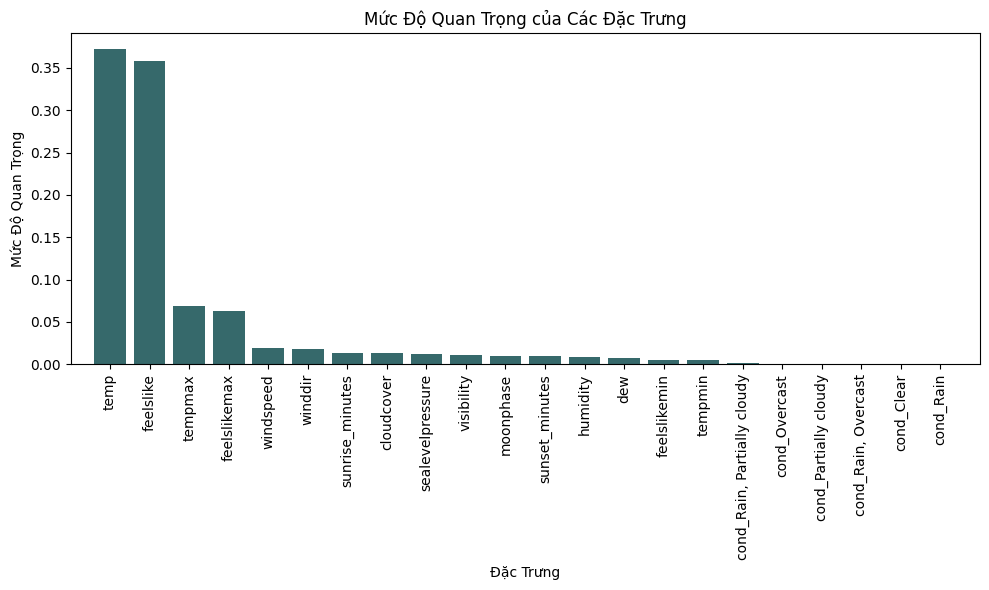

In [769]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns

# Vẽ biểu đồ mức độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
plt.title("Mức Độ Quan Trọng của Các Đặc Trưng")
plt.bar(range(X_train.shape[1]), importances[indices], color='#36696b', align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Đặc Trưng")
plt.ylabel("Mức Độ Quan Trọng")
plt.tight_layout()
plt.show()

In [770]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,stations,sunrise_minutes,sunset_minutes,tempmax_next,cond_Clear,cond_Overcast,cond_Partially cloudy,cond_Rain,"cond_Rain, Overcast","cond_Rain, Partially cloudy"
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,48820099999,393,1046,17.4,False,True,False,False,False,False
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,48820099999,394,1046,18.2,False,True,False,False,False,False
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,48820099999,394,1047,19.6,False,True,False,False,False,False
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,48820099999,394,1048,18.1,False,True,False,False,False,False
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,48820099999,394,1048,17.7,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,Hà Nội,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,17.168,...,"48820099999,48823099999,48825099999,4883109999...",320,1106,30.1,False,False,False,False,False,True
2024-05-13,Hà Nội,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,142.584,...,"48820099999,48823099999,48825099999,4883109999...",319,1106,32.0,False,False,False,False,False,True
2024-05-14,Hà Nội,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,0.900,...,"48820099999,48823099999,48825099999,4883109999...",319,1106,31.0,False,False,False,False,False,True


## Nhiệt độ cao nhất 17/5

In [771]:
weather

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,stations,sunrise_minutes,sunset_minutes,tempmax_next,cond_Clear,cond_Overcast,cond_Partially cloudy,cond_Rain,"cond_Rain, Overcast","cond_Rain, Partially cloudy"
datetime,,,,,,,,,,,,,,,,,,,,,
1990-01-01,Hà Nội,15.9,13.4,14.6,15.9,13.4,14.6,14.0,96.3,NaN,...,48820099999,393,1046,17.4,False,True,False,False,False,False
1990-01-02,Hà Nội,17.4,14.6,16.1,17.4,14.6,16.1,13.7,85.9,NaN,...,48820099999,394,1046,18.2,False,True,False,False,False,False
1990-01-03,Hà Nội,18.2,16.1,16.8,18.2,16.1,16.8,13.8,82.5,NaN,...,48820099999,394,1047,19.6,False,True,False,False,False,False
1990-01-04,Hà Nội,19.6,15.2,16.4,19.6,15.2,16.4,14.3,88.2,NaN,...,48820099999,394,1048,18.1,False,True,False,False,False,False
1990-01-05,Hà Nội,18.1,15.4,16.9,18.1,15.4,16.9,15.8,93.8,NaN,...,48820099999,394,1048,17.7,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-12,Hà Nội,34.0,24.6,28.5,43.5,24.6,33.1,25.5,84.8,17.168,...,"48820099999,48823099999,48825099999,4883109999...",320,1106,30.1,False,False,False,False,False,True
2024-05-13,Hà Nội,30.1,23.0,26.7,33.9,23.0,28.5,22.9,80.9,142.584,...,"48820099999,48823099999,48825099999,4883109999...",319,1106,32.0,False,False,False,False,False,True
2024-05-14,Hà Nội,32.0,24.0,28.0,37.8,24.0,31.0,23.8,78.7,0.900,...,"48820099999,48823099999,48825099999,4883109999...",319,1106,31.0,False,False,False,False,False,True


In [772]:
data_16_5 = {
    'tempmax': [29.6],               # Nhiệt độ cao nhất
    'tempmin': [23.4],               # Nhiệt độ thấp nhất
    'humidity': [78.4],            # Độ ẩm
    'cloudcover': [82.7],          # Mây che phủ
    'windspeed': [11.2],           # Tốc độ gió
    'sealevelpressure': [1013.1],   # Áp suất mực nước biển
    'moonphase' : [0.26],
    'visibility': [19.1] ,
    'winddir' : [44.9],
    'feelslikemax': [31.9] ,
    'feelslikemin': [23.4] ,
    'feelslike': [26.6], 
    'dew' : [21.8],
    'temp': [26],
    'sunrise_minutes': [318],
    'sunset_minutes': [1107],
    'cond_Clear': [0],             # Điều kiện trời quang đãng
    'cond_Overcast': [0],          # Điều kiện trời u ám
    'cond_Partially cloudy': [0],  # Điều kiện trời nhiều mây
    'cond_Rain': [0],              # Điều kiện mưa
    'cond_Rain, Overcast': [0],    # Điều kiện mưa và u ám
    'cond_Rain, Partially cloudy': [1],  # Điều kiện mưa và nhiều mây
    
}

new_data = pd.DataFrame(data_16_5)

In [773]:
new_data

,tempmax,tempmin,humidity,cloudcover,windspeed,sealevelpressure,moonphase,visibility,winddir,feelslikemax,...,dew,temp,sunrise_minutes,sunset_minutes,cond_Clear,cond_Overcast,cond_Partially cloudy,cond_Rain,"cond_Rain, Overcast","cond_Rain, Partially cloudy"
0,29.6,23.4,78.4,82.7,11.2,1013.1,0.26,19.1,44.9,31.9,...,21.8,26,318,1107,0,0,0,0,0,1


In [774]:
predicted_tempmax = model.predict(new_data)
print(f"Dự đoán nhiệt độ cao nhất cho ngày 1 tháng 5 tại Hà Nội là: {predicted_tempmax[0]}°C")

Dự đoán nhiệt độ cao nhất cho ngày 1 tháng 5 tại Hà Nội là: 29.522999999999975°C


## TỐI ƯU

In [775]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200,300,400, 500] , # Số lượng cây quyết định
    'max_features': ['auto', 'sqrt', 'log2'],  # Số lượng đặc trưng để xem xét khi tìm kiếm phân chia tốt nhất
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],  # Số lượng mẫu tối thiểu cần thiết để chia nút
    'min_samples_leaf': [1, 2, 4]  # Số lượng mẫu tối thiểu tại nút lá
}

rf = RandomForestRegressor(random_state=42)


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
385 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [776]:
# Thông tin về tham số tốt nhất và MSE tốt nhất
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Đánh giá mô hình tốt nhất trên tập validation
y_val_pred = best_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("Optimized Validation MSE:", mse_val)
print("Optimized Validation R-squared:", r2_val)

# Sử dụng mô hình tốt nhất để dự đoán trên X_test
predicted_tempmax = best_model.predict(X_test)



Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Optimized Validation MSE: 4.836109354228969
Optimized Validation R-squared: 0.8602185828285754


In [777]:
predicted_tempmax

array([33.51521112, 29.2684254 , 27.99951021, 28.76553005, 32.82490423,
       30.04842846, 30.00195744, 31.00108864, 31.24668522, 30.01276467,
       31.74949036, 32.81941022, 32.65146538, 30.92251318, 31.77002412,
       31.2277942 , 29.35857827])

In [778]:
y_test

datetime
2024-04-30    28.0
2024-05-01    26.2
2024-05-02    27.7
2024-05-03    33.0
2024-05-04    28.7
2024-05-05    28.8
2024-05-06    30.4
2024-05-07    30.0
2024-05-08    31.0
2024-05-09    31.7
2024-05-10    33.0
2024-05-11    34.0
2024-05-12    30.1
2024-05-13    32.0
2024-05-14    31.0
2024-05-15    29.6
2024-05-16    29.6
Name: tempmax_next, dtype: float64

In [779]:
y_pred

array([32.747, 29.059, 28.401, 28.638, 33.371, 29.917, 30.061, 31.036,
       30.663, 30.31 , 31.985, 32.604, 33.404, 30.875, 31.738, 31.503,
       29.523])

y_pred - Mean Absolute Error (MAE): 1.8304117647058824
y_pred - Root Mean Squared Error (RMSE): 2.3746109898131014
predicted_tempmax - Mean Absolute Error (MAE): 1.7954878110197963
predicted_tempmax - Root Mean Squared Error (RMSE): 2.3567715631399984


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


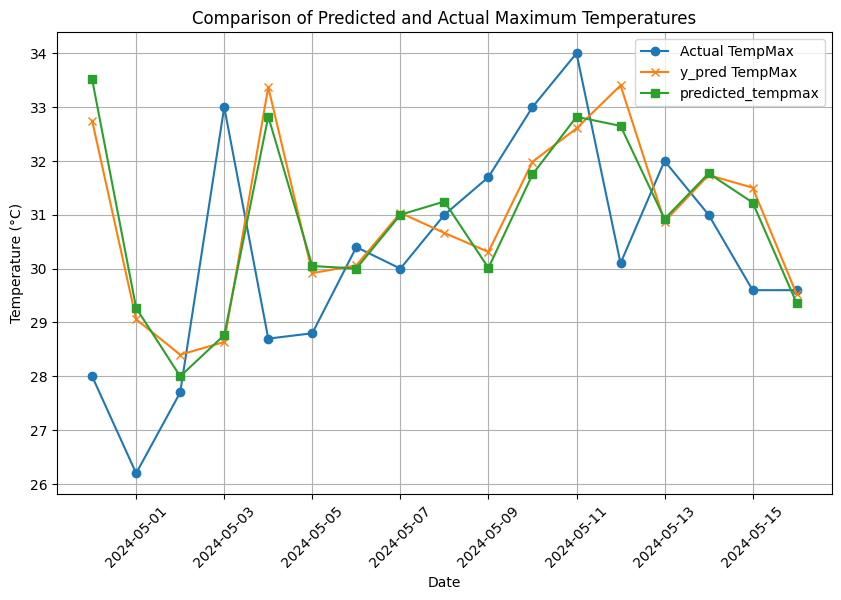

In [780]:
aligned_y_test = y_test[:len(y_pred)]
mae_pred = mean_absolute_error(aligned_y_test, y_pred)
rmse_pred = mean_squared_error(aligned_y_test, y_pred, squared=False)

mae_tempmax = mean_absolute_error(aligned_y_test, predicted_tempmax)
rmse_tempmax = mean_squared_error(aligned_y_test, predicted_tempmax, squared=False)

print(f"y_pred - Mean Absolute Error (MAE): {mae_pred}")
print(f"y_pred - Root Mean Squared Error (RMSE): {rmse_pred}")
print(f"predicted_tempmax - Mean Absolute Error (MAE): {mae_tempmax}")
print(f"predicted_tempmax - Root Mean Squared Error (RMSE): {rmse_tempmax}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(aligned_y_test.index, aligned_y_test, label='Actual TempMax', marker='o')
plt.plot(aligned_y_test.index, y_pred, label='y_pred TempMax', marker='x')
plt.plot(aligned_y_test.index, predicted_tempmax, label='predicted_tempmax', marker='s')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Predicted and Actual Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [781]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error


In [782]:
svm_model = SVR(kernel='rbf')

# Huấn luyện mô hình
svm_model.fit(X_train, y_train)

# Dự đoán với tập kiểm tra
forecast = svm_model.predict(X_test)

# Tính toán các chỉ số lỗi
mape = mean_absolute_percentage_error(y_test, forecast)
mae = mean_absolute_error(y_test, forecast)
mse = mean_squared_error(y_test, forecast)

In [783]:
forecast

array([33.21427502, 29.34372919, 29.08162863, 29.81215439, 31.6687356 ,
       29.83785051, 29.97391244, 30.5769436 , 30.97634846, 30.29806039,
       31.72885804, 32.71327422, 31.96762579, 32.70850786, 32.5423948 ,
       31.43526338, 30.11928017])

y_pred - Mean Absolute Error (MAE): 1.8304117647058824
y_pred - Root Mean Squared Error (RMSE): 2.3746109898131014
predicted_tempmax - Mean Absolute Error (MAE): 1.7954878110197963
predicted_tempmax - Root Mean Squared Error (RMSE): 2.3567715631399984
SVM Forecast- Root Mean Squared Error (RMSE): 1.6702133299739836
SVM Forecast - Root Mean Squared Error (RMSE): 2.0975081528221513


c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


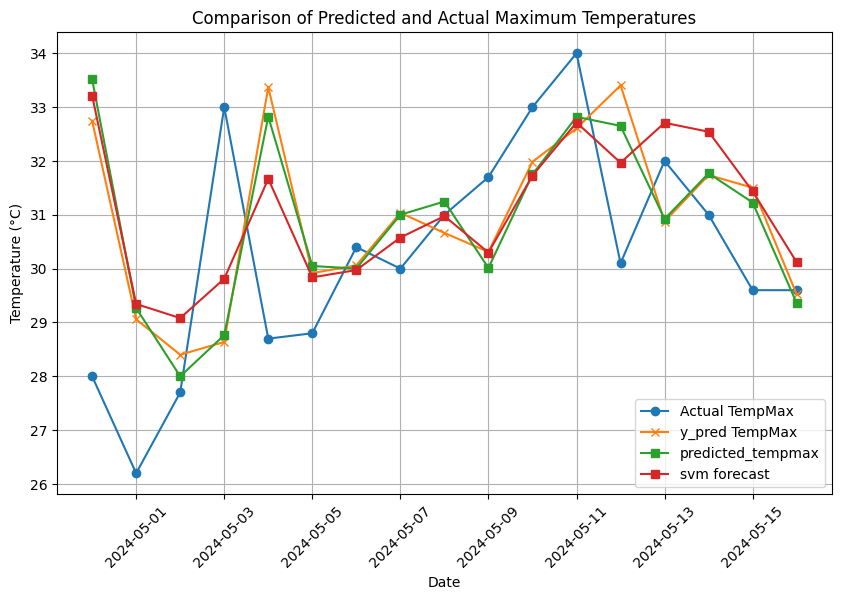

In [784]:
aligned_y_test = y_test[:len(y_pred)]
mae_pred = mean_absolute_error(aligned_y_test, y_pred)
rmse_pred = mean_squared_error(aligned_y_test, y_pred, squared=False)

mae_tempmax = mean_absolute_error(aligned_y_test, predicted_tempmax)
rmse_tempmax = mean_squared_error(aligned_y_test, predicted_tempmax, squared=False)

mae_svm = mean_absolute_error(aligned_y_test, forecast)
rmse_svm = mean_squared_error(aligned_y_test, forecast, squared=False)
print(f"y_pred - Mean Absolute Error (MAE): {mae_pred}")
print(f"y_pred - Root Mean Squared Error (RMSE): {rmse_pred}")
print(f"predicted_tempmax - Mean Absolute Error (MAE): {mae_tempmax}")
print(f"predicted_tempmax - Root Mean Squared Error (RMSE): {rmse_tempmax}")
print(f"SVM Forecast- Root Mean Squared Error (RMSE): {mae_svm}")
print(f"SVM Forecast - Root Mean Squared Error (RMSE): {rmse_svm}")
# Visualization
plt.figure(figsize=(10, 6))
plt.plot(aligned_y_test.index, aligned_y_test, label='Actual TempMax', marker='o')
plt.plot(aligned_y_test.index, y_pred, label='y_pred TempMax', marker='x')
plt.plot(aligned_y_test.index, predicted_tempmax, label='predicted_tempmax', marker='s')
plt.plot(aligned_y_test.index, forecast, label='svm forecast', marker='s')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Comparison of Predicted and Actual Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()